# The Sparks Foundation- Data Science & Business Analytics Internship

#### Author : Kashif Karim

#### Task  2: Prediction Using UnSupervised Machine Learning
- In this task it is required to predict the optimum number of cluster for the iris data set .iris data set consists of 3 types of flower namely Iris-setosa Iris-versicolour and Iris-virginica

**Dataset Variables**

- **sepal_length :** Shows the length of sepal
- **sepal_width :** shows the width of sepal
- **petal_length :** shows the length of petal
- **petal_width :** shows the width of petal
- **species :** shows the species of iris

### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Import Dataset

In [2]:
df = sns.load_dataset('iris')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Dataset Shape

In [4]:
df.shape

(150, 5)

- There are **150 rows** and **5 columns** in the dataset.

#### Columns

In [5]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

#### Columns 
- sepal_length
- sepal_width
- petal_length
- petal_width
- species

#### Uniques Species

In [6]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

#### Species
- setosa
- versicolor 
- virginica

#### Describe Data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


- **It illustrates that there are no null values in the data set**
- sepal_length, sepal_width, petal_length, petal_width are of float type variables
- species is object type variable

In [8]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Data Visualization 

**sepal_length vs petal_length**

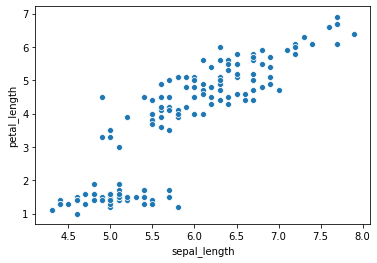

In [9]:
sns.scatterplot(x='sepal_length', y='petal_length', data=df)

**sepal_length vs petal_length with respect to species**

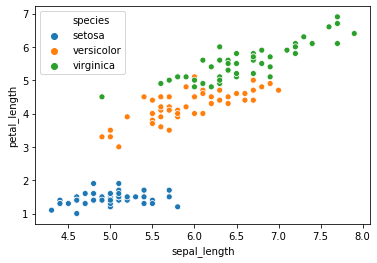

In [10]:
sns.scatterplot(x='sepal_length', y='petal_length',hue ='species', data=df)

**sepal_width vs petal_width with respect to species**

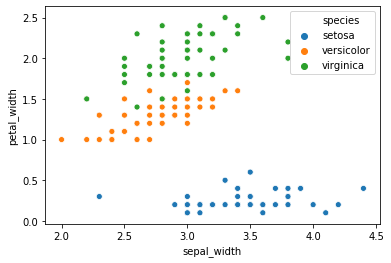

In [11]:
sns.scatterplot(x='sepal_width', y='petal_width',hue ='species', data=df)

**sepal_length vs petal_width with respect to species**

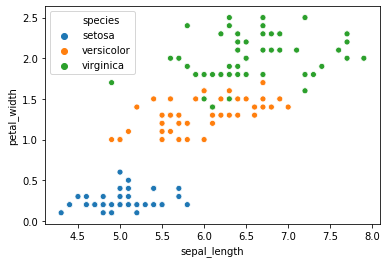

In [12]:
sns.scatterplot(x='sepal_length', y='petal_width',hue ='species', data=df)

**sepal_width vs petal_length with respect to species**

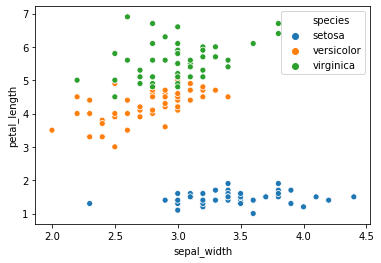

In [13]:
sns.scatterplot(x='sepal_width', y='petal_length',hue ='species', data=df)

### Distribution Plot

**Sepal_length**

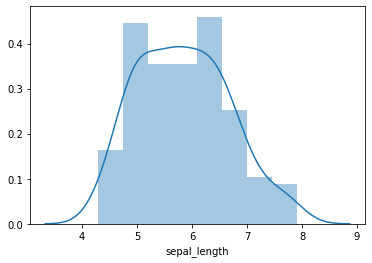

In [14]:
sns.distplot(df['sepal_length'])

**Sepal_width**

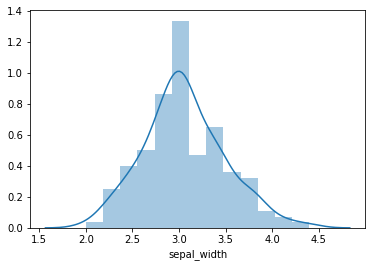

In [15]:
sns.distplot(df['sepal_width'])

**Petal_length**

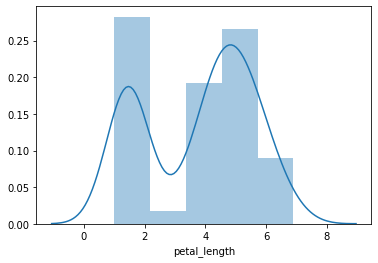

In [16]:
sns.distplot(df['petal_length'])

**Petal_width**

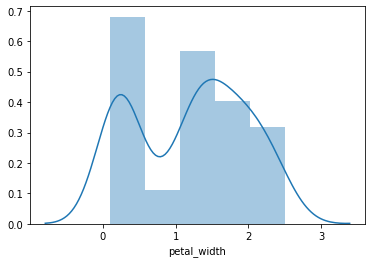

In [17]:
sns.distplot(df['petal_width'])

- ### Above Distribution plots illustrates that all the data is normaliy distributed, wich means that there is no outlier detected in data

### Prepare data for model deployment

In [18]:
# now we will drop the label column because it is an unsupervised learning problem 
iris = pd.DataFrame(df)
iris_df = df.drop(columns= ['species'] )
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Finding the optimum number of clusters

Before clustering the data using kmeans, we need to specify the number of clusters. In order to find the optimum number of clusters, there are various methods available like Silhouette Coefficient and the Elbow method. Here, we would use the **Elbow method** .

### Brief about the Elbow method

In this method, the number of clusters are varies within a certain range. For each number, within-cluster sum of square (wss) value is calculated and stored in a list. These value are then plotted against the range of number of clusters used before. The location of bend in the 2d plot indicates the appropiate number of clusters.


## Elbow Method

- #### Import KMeans from SKlearn

In [19]:
from sklearn.cluster import KMeans

In [20]:
# wcss would be a list to store within cluster sum of square values
wcss = []

clusters_range = range(1,15)
for k in clusters_range:
    km = KMeans(n_clusters=k)
    km = km.fit(iris_df)
    wcss.append(km.inertia_)

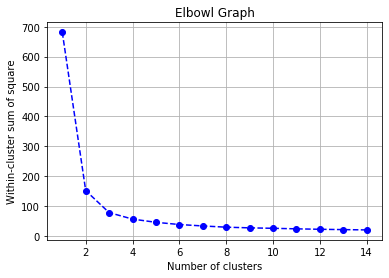

In [21]:
# Plotting the "within-cluster sum of square" against clusters range

plt.plot(clusters_range, wcss, 'go--', color='b')
plt.title('Elbowl Graph')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of square')
plt.grid()
plt.show()


we can clearly see why it is called **The Elbow method** from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as **3**.

## Applying KMeans clustering on the data

In [22]:
model = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
predictions = model.fit_predict(iris_df)

In [23]:
print(predictions)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


## Visualising the clusters

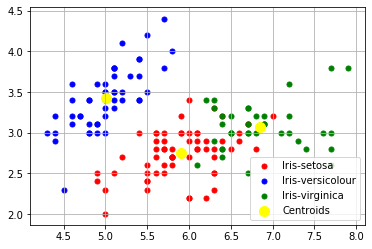

In [24]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values
plt.scatter(x[predictions == 0, 0], x[predictions == 0, 1], s = 25, c = 'red', label = 'Iris-setosa')
plt.scatter(x[predictions == 1, 0], x[predictions == 1, 1], s = 25, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[predictions == 2, 0], x[predictions == 2, 1], s = 25, c = 'green', label = 'Iris-virginica')

# Plotting the cluster centers

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()
plt.grid()
plt.show()

- **The Graph Illutrates that the model predicted Three Labels [0,1,2] which means that the model classified the data correctly**